In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.morphology import disk
from skimage.filters.rank import entropy
from scipy import ndimage as nd

In [ ]:
print(os.listdir('/content/drive/MyDrive/Datasets/Nail Disease Dataset'))

['train', 'test']


In [ ]:
SIZE = 128

train_images = []
train_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Datasets/Nail Disease Dataset/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.*")):

        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Darier's disease
Clubbing
Beau's lines
Aloperia areata
Yellow nails
Bluish nail
Eczema
Onycholycis


In [ ]:
train_images.shape

(100, 128, 128, 3)

In [ ]:
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Datasets/Nail Disease Dataset/test/*"):
    true_label = directory_path.split("/")[-1]
    print(true_label)
    for img_path in glob.glob(os.path.join(directory_path,"*.*")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(true_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

Yellow nails
Onycholycis
Eczema
Clubbing
Bluish nail
Aloperia areata
Darier's disease
Beau's lines


In [ ]:
test_images.shape

(20, 128, 128, 3)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

print(np.unique(train_labels_encoded))
print(np.unique(test_labels_encoded))

[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
def feature_extractor(x_train):
  count = 1
  image_dataset = pd.DataFrame()
  for image in range(x_train.shape[0]):
    df = pd.DataFrame()
    img = x_train[image, :,:,:]
    pixel_values = img.reshape(-1)/2255.0
    df['Pixel_Value'] = pixel_values

    #GAUSSIAN with sigma=5
    gaussian_img = nd.gaussian_filter(img, sigma=5)
    gaussian_img1 = gaussian_img.reshape(-1)/255.0
    df['Gaussian s5'] = gaussian_img1

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #SOBEL
    edge_sobel = sobel(gray_img)
    edge_sobel_uint8 = np.uint8(edge_sobel * 255)
    col_img = cv2.cvtColor(edge_sobel_uint8,cv2.COLOR_GRAY2BGR)
    df['Sobel'] = col_img.reshape(-1)/255.0

    num = 1
    for theta in range(2):   #Defining number of thetas
      theta = theta / 4. * np.pi
      for sigma in ([0.6,1]):  #Sigma with Diff no.
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
          for gamma in ([0.5, 1]):

            gabor_label = 'Gabor' + str(num)  #Labeling Gabor columns as Gabor1, Gabor2..
            ksize=9
            kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
            fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
            filtered_img = fimg.reshape(-1)/255.0
            df[gabor_label] = filtered_img
            num += 1

    #VARIANCE with size=5
    variance_img = nd.generic_filter(img, np.var, size=5)
    variance_img1 = variance_img.reshape(-1)/255.0
    df['Variance s5'] = variance_img1

    #Append features from current image to the dataset
    image_dataset = pd.concat([image_dataset, df], ignore_index=True)
    print("Done Image : ",count)
    count += 1

  return image_dataset

In [ ]:
#Extract features from training images
image_features = feature_extractor(x_train)

Done Image :  1
Done Image :  2
Done Image :  3
Done Image :  4
Done Image :  5
Done Image :  6
Done Image :  7
Done Image :  8
Done Image :  9
Done Image :  10
Done Image :  11
Done Image :  12
Done Image :  13
Done Image :  14
Done Image :  15
Done Image :  16
Done Image :  17
Done Image :  18
Done Image :  19
Done Image :  20
Done Image :  21
Done Image :  22
Done Image :  23
Done Image :  24
Done Image :  25
Done Image :  26
Done Image :  27
Done Image :  28
Done Image :  29
Done Image :  30
Done Image :  31
Done Image :  32
Done Image :  33
Done Image :  34
Done Image :  35
Done Image :  36
Done Image :  37
Done Image :  38
Done Image :  39
Done Image :  40
Done Image :  41
Done Image :  42
Done Image :  43
Done Image :  44
Done Image :  45
Done Image :  46
Done Image :  47
Done Image :  48
Done Image :  49
Done Image :  50
Done Image :  51
Done Image :  52
Done Image :  53
Done Image :  54
Done Image :  55
Done Image :  56
Done Image :  57
Done Image :  58
Done Image :  59
Done I

In [ ]:
image_features

,Pixel_Value,Gaussian s5,Sobel,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,...,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Variance s5
0,0.069180,0.623529,0.0,0.0,0.0,1.000000,0.847059,1.000000,0.619608,1.000000,...,0.431373,0.0,0.0,1.0,1.000000,0.011765,0.007843,0.227451,0.113725,0.172549
1,0.070067,0.627451,0.0,0.0,0.0,1.000000,0.858824,1.000000,0.627451,1.000000,...,0.435294,0.0,0.0,1.0,1.000000,0.003922,0.000000,0.227451,0.109804,0.270588
2,0.077162,0.627451,0.0,0.0,0.0,1.000000,0.945098,1.000000,0.690196,1.000000,...,0.482353,0.0,0.0,1.0,1.000000,0.007843,0.003922,0.250980,0.121569,0.243137
3,0.069180,0.623529,0.0,0.0,0.0,1.000000,0.847059,1.000000,0.619608,1.000000,...,0.431373,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.223529,0.109804,0.176471
4,0.070067,0.627451,0.0,0.0,0.0,1.000000,0.858824,1.000000,0.627451,1.000000,...,0.435294,0.0,0.0,1.0,1.000000,0.003922,0.000000,0.227451,0.109804,0.274510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915195,0.038137,0.396078,0.0,0.0,0.0,0.921569,0.462745,0.674510,0.337255,0.560784,...,0.239216,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.125490,0.062745,0.498039
4915196,0.066075,0.396078,0.0,0.0,0.0,1.000000,0.807843,1.000000,0.592157,0.984314,...,0.411765,0.0,0.0,1.0,1.000000,0.007843,0.003922,0.215686,0.105882,0.439216
4915197,0.019512,0.392157,0.0,0.0,0.0,0.513725,0.250980,0.384314,0.184314,0.325490,...,0.117647,0.0,0.0,1.0,0.764706,0.000000,0.000000,0.058824,0.023529,0.611765
4915198,0.038137,0.392157,0.0,0.0,0.0,0.909804,0.462745,0.662745,0.337255,0.549020,...,0.239216,0.0,0.0,1.0,1.000000,0.007843,0.003922,0.129412,0.066667,0.482353


In [ ]:
n_features = image_features.shape[1]
n_features

36

In [ ]:
image_features = np.expand_dims(image_features, axis=0)
image_features.shape

(1, 4915200, 36)

In [ ]:
X_train = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features
X_train.shape

(100, 1769472)

In [ ]:
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)

Done Image :  1
Done Image :  2
Done Image :  3
Done Image :  4
Done Image :  5
Done Image :  6
Done Image :  7
Done Image :  8
Done Image :  9
Done Image :  10
Done Image :  11
Done Image :  12
Done Image :  13
Done Image :  14
Done Image :  15
Done Image :  16
Done Image :  17
Done Image :  18
Done Image :  19
Done Image :  20


In [ ]:
test_features = np.expand_dims(test_features, axis=0)
X_test = np.reshape(test_features, (x_test.shape[0], -1))

In [ ]:
X_test.shape

(20, 1769472)

### Random Forest

In [ ]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Fit the model on training data
RF_model.fit(X_train, y_train) #For sklearn no one hot encoding

RandomForestClassifier(random_state=42)

In [ ]:
#Predict on test
rf_test_prediction = RF_model.predict(X_test)

In [ ]:
y_test

array([7, 7, 6, 6, 6, 5, 5, 5, 3, 3, 2, 2, 0, 0, 0, 0, 4, 1, 1, 1])

In [ ]:
rf_test_prediction

array([7, 5, 5, 6, 6, 5, 5, 5, 3, 3, 2, 2, 0, 0, 0, 0, 4, 1, 1, 5])

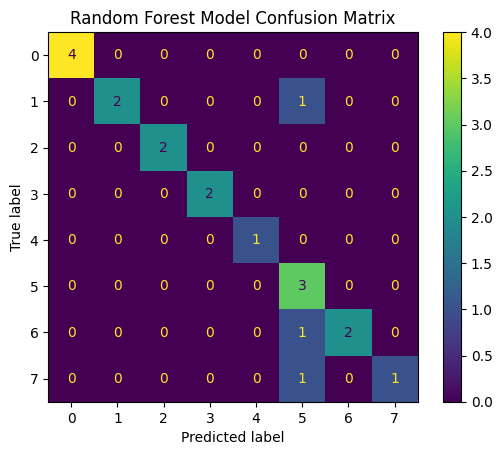

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rf_test_prediction, labels=RF_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_model.classes_)
disp.plot()
plt.title("Random Forest Model Confusion Matrix")
plt.show()

In [ ]:
#Print overall accuracy
from sklearn import metrics


Accuracy =  0.75


In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, rf_test_prediction))

Accuracy =  0.85


### Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
SVM_model = svm.SVC()  #For multiclass classification
SVM_model.fit(X_train, y_train)

SVC()

In [ ]:
svm_test_prediction = SVM_model.predict(X_test)

In [ ]:
y_test

array([7, 7, 6, 6, 6, 5, 5, 5, 3, 3, 2, 2, 0, 0, 0, 0, 4, 1, 1, 1])

In [ ]:
svm_test_prediction

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

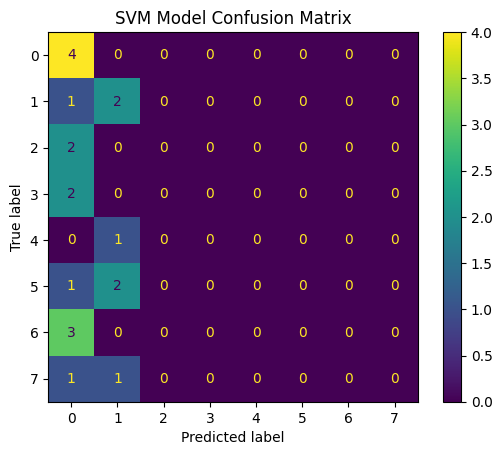

In [ ]:
cm = confusion_matrix(y_test, svm_test_prediction, labels=SVM_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM_model.classes_)
disp.plot()
plt.title("SVM Model Confusion Matrix")
plt.show()

In [ ]:
print ("SVM Accuracy = ", metrics.accuracy_score(y_test, svm_test_prediction))

SVM Accuracy =  0.3


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn_model_prediction = knn_model.predict(X_test)

In [ ]:
y_test

array([7, 7, 6, 6, 6, 5, 5, 5, 3, 3, 2, 2, 0, 0, 0, 0, 4, 1, 1, 1])

In [ ]:
knn_model_prediction

array([7, 6, 6, 0, 0, 1, 1, 5, 3, 3, 2, 2, 0, 0, 0, 0, 4, 1, 1, 0])

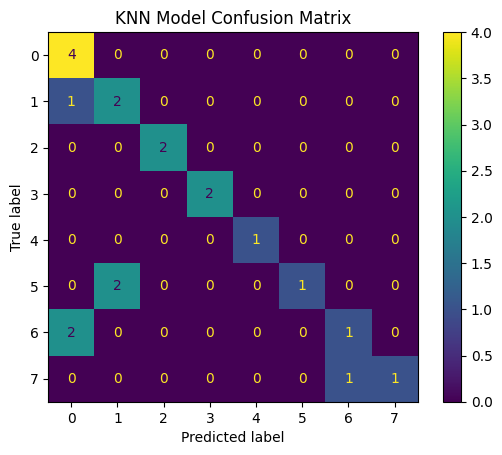

In [ ]:
cm = confusion_matrix(y_test, knn_model_prediction, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot()
plt.title("KNN Model Confusion Matrix")
plt.show()

In [ ]:
print ("KNN Accuracy = ", metrics.accuracy_score(y_test, knn_model_prediction))

KNN Accuracy =  0.7


In [ ]:
print ("F1 Score = ", f1_score(y_test, knn_model_prediction, average='micro'))

F1 Score =  0.7727272727272727


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
print ("Gaussian Naive Bayes Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes Accuracy =  0.6


In [ ]:
y_test

array([7, 7, 6, 6, 6, 5, 5, 5, 3, 3, 2, 2, 0, 0, 0, 0, 4, 1, 1, 1])

In [ ]:
y_pred

array([0, 5, 6, 6, 6, 5, 5, 5, 3, 0, 2, 2, 0, 0, 6, 0, 0, 0, 6, 2])

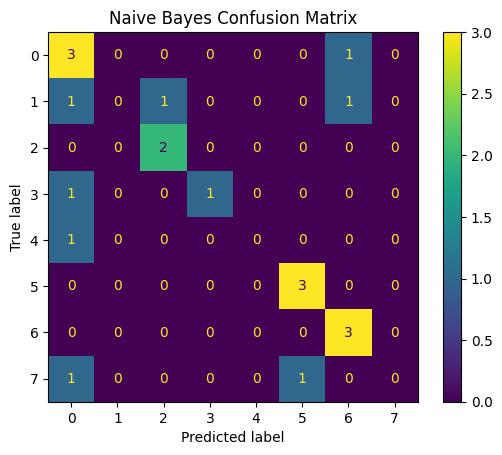

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

### Saving the model

In [ ]:
import pickle

In [ ]:
filename = "RF_model_NailDisease_v1"
with open(filename,'wb') as f:
  pickle.dump(RF_model,f)

In [ ]:
# Load the model and use
with open("RF_model_NailDisease_v1",'rb') as f:
  rf_loaded_model = pickle.load(f)

### Feature function for this model

In [ ]:
test_features = np.expand_dims(test_features, axis=0)
X_test = np.reshape(test_features, (x_test.shape[0], -1))

In [ ]:
predicted_value = rf_loaded_model.predict(X_test)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, predicted_value))

Accuracy =  0.8666666666666667
